In [3]:
import openpyxl as xl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

wb = xl.load_workbook("dados\\Matriz Modelo - VERSÃO SISTEMA.xlsx")
sheet = wb['MATRIZ CONTRATOS (2)']

df = pd.read_excel("dados\\Matriz Modelo - VERSÃO SISTEMA.xlsx", sheet_name='MATRIZ CONTRATOS')





In [15]:
dfIDs = df.iloc[6:,0]
dfMunicipio= df.iloc[6:,1]
dfNota = df.iloc[6:,34]
dfIRCE = df.iloc[6:,2]
dfDCE=df.iloc[6:,3]
dfMunicipio


6                    ABAIRA
7                     ABARE
8                 ACAJUTIBA
9                  ADUSTINA
10                AGUA FRIA
               ...         
418    VITORIA DA CONQUISTA
419                  WAGNER
420               WANDERLEY
421     WENCESLAU GUIMARAES
422             XIQUE-XIQUE
Name: Unnamed: 1, Length: 417, dtype: object

In [7]:
dfIRCE

6      Itaberaba                                     ...
7      Paulo Afonso                                  ...
8      Alagoinhas                                    ...
9      Paulo Afonso                                  ...
10     Serrinha                                      ...
                             ...                        
418    Vitória da Conquista                          ...
419    Itaberaba                                     ...
420    Barreiras                                     ...
421    Santo Antônio de Jesus                        ...
422    Irecê                                         ...
Name: Unnamed: 2, Length: 417, dtype: object

In [5]:
dfNota

6       34.375
7       34.375
8      32.8125
9        31.25
10     39.0625
        ...   
418      31.25
419    29.6875
420      31.25
421    29.6875
422    35.9375
Name: Unnamed: 34, Length: 417, dtype: object

In [9]:
dfIDs

6      2900108
7      2900207
8      2900306
9      2900355
10     2900405
        ...   
418    2933307
419    2933406
420    2933455
421    2933505
422    2933604
Name: MATRIZ MODELO, Length: 417, dtype: object

In [17]:
dfDCE

6      1ª DCE
7      1ª DCE
8      1ª DCE
9      1ª DCE
10     1ª DCE
        ...  
418    2ª DCE
419    1ª DCE
420    1ª DCE
421    2ª DCE
422    1ª DCE
Name: Unnamed: 3, Length: 417, dtype: object

In [18]:
novo_df = {
    'id':dfIDs.values,
    'municipio':dfMunicipio.values,
    'irce':dfIRCE.values,
    'dce':dfDCE.values,
    'nota':dfNota.values
}

In [19]:
dfPlot = pd.DataFrame(novo_df)
dfPlot

,id,municipio,irce,dce,nota
0,2900108,ABAIRA,Itaberaba ...,1ª DCE,34.375
1,2900207,ABARE,Paulo Afonso ...,1ª DCE,34.375
2,2900306,ACAJUTIBA,Alagoinhas ...,1ª DCE,32.8125
3,2900355,ADUSTINA,Paulo Afonso ...,1ª DCE,31.25
4,2900405,AGUA FRIA,Serrinha ...,1ª DCE,39.0625
...,...,...,...,...,...
412,2933307,VITORIA DA CONQUISTA,Vitória da Conquista ...,2ª DCE,31.25
413,2933406,WAGNER,Itaberaba ...,1ª DCE,29.6875
414,2933455,WANDERLEY,Barreiras ...,1ª DCE,31.25
415,2933505,WENCESLAU GUIMARAES,Santo Antônio de Jesus ...,2ª DCE,29.6875


In [20]:
dfPlot = dfPlot.sort_values(by='nota', ascending=False)
dfPlot

,id,municipio,irce,dce,nota
342,2928109,SANTA MARIA DA VITORIA,Santa Maria da Vitória ...,2ª DCE,45.3125
219,2918407,JUAZEIRO,Juazeiro ...,1ª DCE,43.75
250,2920601,MARAGOGIPE,Salvador ...,1ª DCE,43.75
78,2906501,CANDEIAS,Salvador ...,1ª DCE,43.75
12,2901205,ANAGE,Vitória da Conquista ...,2ª DCE,42.1875
...,...,...,...,...,...
375,2930600,SERROLANDIA,Jacobina ...,1ª DCE,18.75
268,2922201,MUNIZ FERREIRA,Santo Antônio de Jesus ...,2ª DCE,18.75
227,2918902,LAJEDAO,Eunápolis ...,2ª DCE,18.75
257,2921302,MILAGRES,Santo Antônio de Jesus ...,2ª DCE,17.1875


In [21]:
dftop50 = dfPlot.head(50)

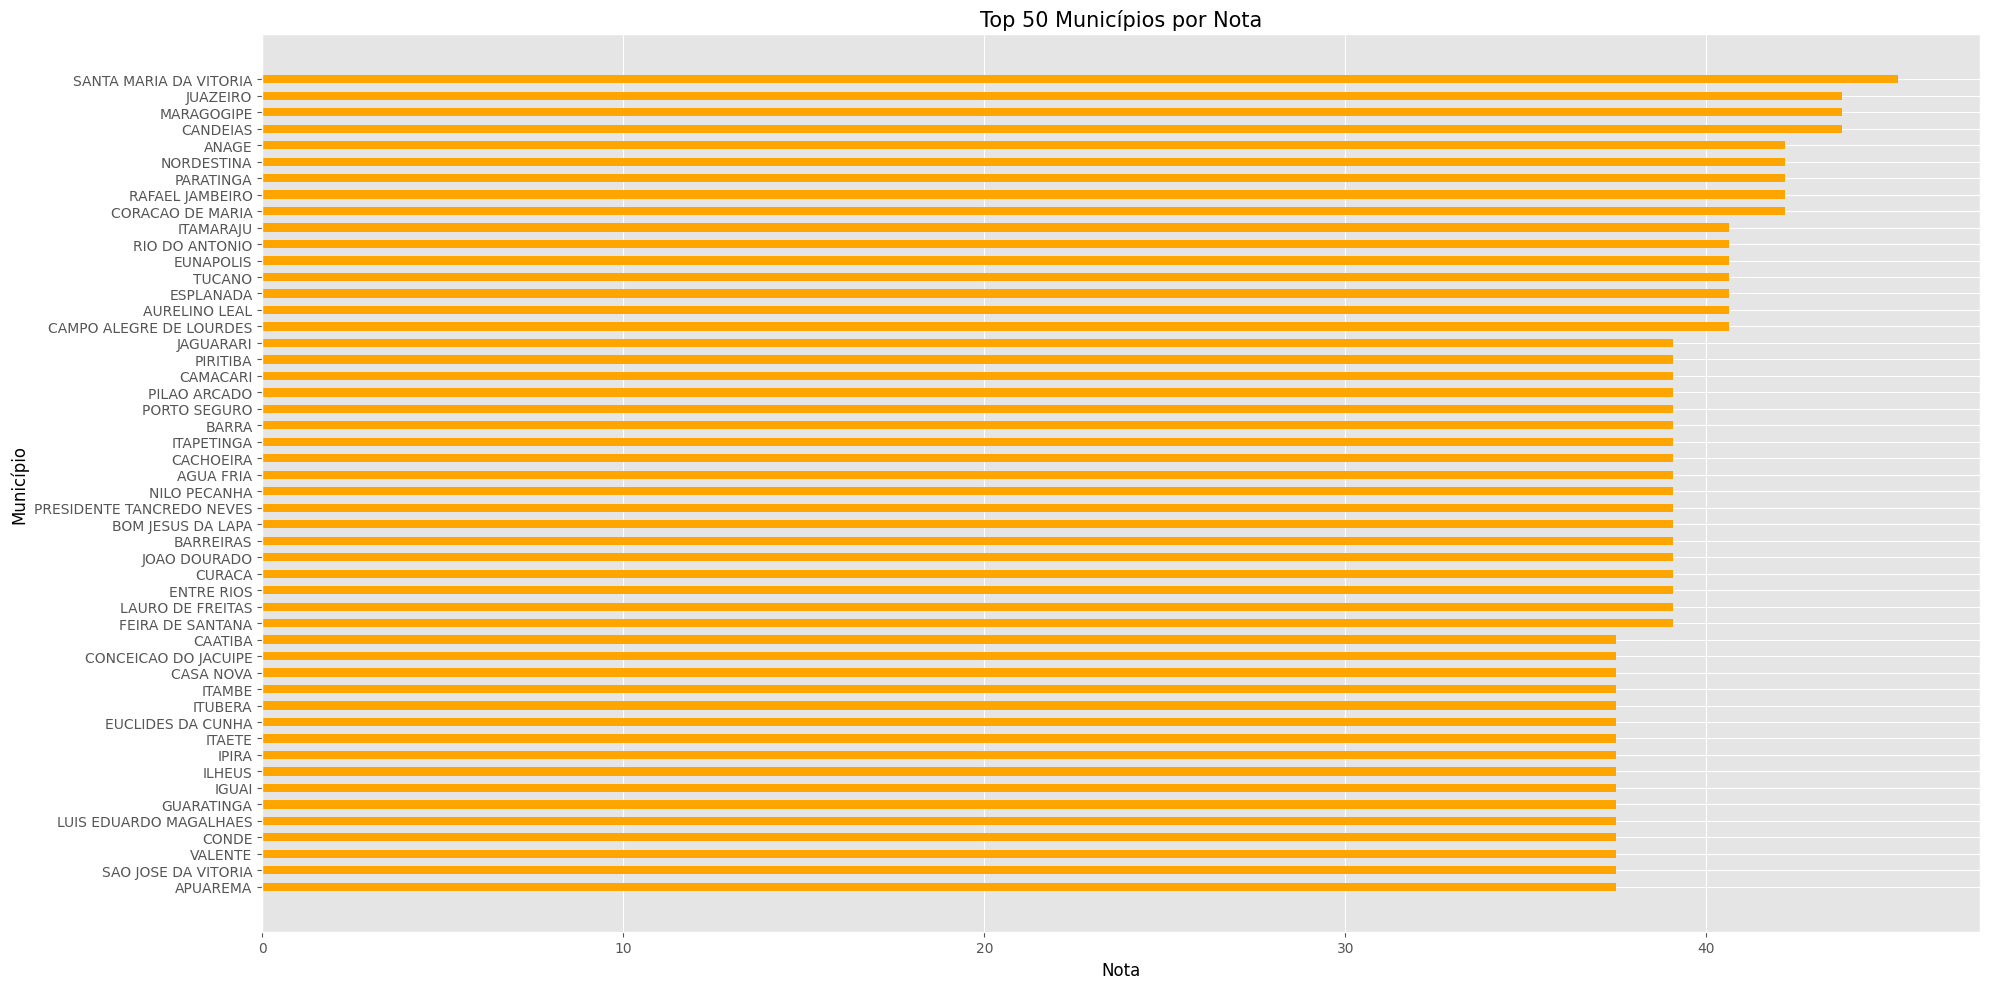

In [22]:
# Definir um estilo com fundo escuro
plt.style.use('ggplot')


# Selecionar os primeiros 50 municípios
dfTop50 = dfPlot.head(50)

# Definir o tamanho da figura (largura, altura)
plt.figure(figsize=(20, 10))

# Criar o gráfico de barras horizontais com barras mais largas
plt.barh(dfTop50['municipio'], dfTop50['nota'], color='orange', height=0.5,)

# Inverter o eixo y para mostrar o maior no topo
plt.gca().invert_yaxis()

# Configurações adicionais
plt.xlabel('Nota', fontsize=12, color='black')
plt.ylabel('Município', fontsize=12, color='black')
plt.title('Top 50 Municípios por Nota', fontsize=15, color='black')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.show()

In [41]:
df1DCEgroup = dfPlot.groupby(by=['dce'])['municipio'].apply(list)
#df1DCE = pd.DataFrame(df1DCEgroup)
print(df1DCEgroup)
type(df1DCEgroup)
df1DCE = pd.DataFrame([df1DCEgroup])
df1DCE


dce
1ª DCE    [JUAZEIRO, MARAGOGIPE, CANDEIAS, NORDESTINA, T...
2ª DCE    [SANTA MARIA DA VITORIA, ANAGE, PARATINGA, RAF...
Name: municipio, dtype: object


dce,1ª DCE,2ª DCE
municipio,"[JUAZEIRO, MARAGOGIPE, CANDEIAS, NORDESTINA, T...","[SANTA MARIA DA VITORIA, ANAGE, PARATINGA, RAF..."


In [31]:
# Definir um estilo com fundo escuro
plt.style.use('ggplot')


# Selecionar os primeiros 50 municípios
df1DCEgroup = dfPlot.groupby(by=['dce'])['municipio'].apply(list)
df1DCE = pd.DataFrame(df1DCEgroup)
print(df1DCE)

# Definir o tamanho da figura (largura, altura)
plt.figure(figsize=(20, 10))

# Criar o gráfico de barras horizontais com barras mais largas
plt.barh(df1DCE['municipio'], df1DCE['dce'], color='orange', height=0.5,)

# Inverter o eixo y para mostrar o maior no topo
plt.gca().invert_yaxis()

# Configurações adicionais
plt.xlabel('Nota', fontsize=12, color='black')
plt.ylabel('Município', fontsize=12, color='black')
plt.title('Top 50 Municípios por Nota', fontsize=15, color='black')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

plt.show()

                                                municipio
dce                                                      
1ª DCE  [JUAZEIRO, MARAGOGIPE, CANDEIAS, NORDESTINA, T...
2ª DCE  [SANTA MARIA DA VITORIA, ANAGE, PARATINGA, RAF...


KeyError: 'dce'

<Figure size 2000x1000 with 0 Axes>

In [71]:
import folium
import pandas as pd

# Exemplo: DataFrame com latitude e longitude para cada município
# Certifique-se de ter as coordenadas de latitude e longitude para os municípios
# Exemplo fictício para demonstração, troque pelos dados reais.
data = {
    'municipio': dfMunicipio,
    'nota': dfNota,
    'latitude': df,
    'longitude': [-38.5014, -38.5300, -38.5100]
}

# Criar um DataFrame com essas informações
df_municipios = pd.DataFrame(data)

# Definir o ponto inicial no mapa (centralizando no primeiro município)
mapa = folium.Map(location=[df_municipios['latitude'][0], df_municipios['longitude'][0]], zoom_start=6)

# Adicionar marcadores ao mapa
for index, row in df_municipios.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['municipio']}: {row['nota']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Salvar o mapa em um arquivo HTML
mapa.save('mapa_municipios.html')

# Exibir o mapa diretamente (se você estiver em um ambiente Jupyter)
mapa
